# 🏦 Smart Banking Assistant  
### **Loan Eligibility Prediction & Application Automation System**

This project demonstrates the development of an intelligent **Smart Banking Assistant** using **Machine Learning** and **Gradio** for an interactive interface.

### 🔍 **Project Overview**
The system predicts **loan eligibility** of applicants based on their personal, financial, and asset information using multiple ML algorithms:
- Logistic Regression  
- Decision Tree  
- Random Forest  
- Support Vector Machine (SVM)

It also provides:
- A **Loan Application Portal** for users  
- An **Admin Dashboard** to view submitted applications  
- Integration with **SQLite Database** for storing admin accounts and loan applications  
- **Google Drive** storage for dataset and trained model files (for persistent access in Google Colab)

### ⚙️ **Technologies & Tools Used**
- **Python Libraries:** pandas, numpy, scikit-learn, matplotlib, seaborn, joblib  
- **Database:** SQLite (auto-created and stored in Google Drive)  
- **Interface:** Gradio  
- **Platform:** Google Colab  

### 🎯 **Key Features**
- Data cleaning and preprocessing  
- Model training and comparison  
- Loan eligibility prediction using trained ML models  
- Saving & loading models and encoders  
- User-friendly web interface (Gradio)  
- Admin login system with database-based authentication  

---

> **Goal:** To create a practical, end-to-end machine learning–powered smart banking system that can automate loan eligibility prediction and manage customer applications efficiently.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Define paths
dataset_path = "/content/drive/MyDrive/loan_approval_dataset.csv"
model_save_path = "/content/drive/MyDrive/SmartBankingModels/"

# Create folder if not exists
import os
os.makedirs(model_save_path, exist_ok=True)


In [ ]:
!ls "/content/drive/MyDrive/"


'1756566708 - 99.00 To RASMI MITTAL on Google Pay.png'
'Abstract-3rd review .pdf'
'Brainwave Matrix Solutions || JL15.gsheet'
 Classroom
'Colab Notebooks'
'Data science 211.pdf'
'DCCN Assignment  (1).pdf'
'DCCN Assignment .pdf'
'Deep Belief Network'
'Deep Belief Network.pptx'
'Deep learning result  (1).pdf'
'Deep learning result .pdf'
 DOC-20250226-WA0000.
'DOC-20250226-WA0000. (1)'
 IMG-20250210-WA0005.jpg
'IMGL9221 (1).JPG'
'IMGL9221 (2).JPG'
 IMGL9221.JPG
'LINUX COMMANDS PPT.pptx'
 loan_approval_dataset.csv
'msuniv.com univ_dept halltickets show-apr25-hallticket.pdf'
'NETWORK CONNECTING DEVICES.pptx'
'Photo from Sawla'
'Photos 2023-10-02 09-57-53_550x310.mp4'
'Photos 2023-10-02 09-57-53.mp4'
'Receipt '
 Receipt.pdf
'Review 211.pdf'
 SmartBankingModels


In [ ]:
import pandas as pd

# Load dataset from Google Drive
data = pd.read_csv(dataset_path)
data.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# Check missing values
print("Missing values per column:\n", data.isnull().sum())

# --- Clean column names (remove extra spaces) ---
data.columns = data.columns.str.strip()

# --- Clean string values in categorical columns ---
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.strip()

# Fill missing values
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

# Encode categorical variables with separate encoders
encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        encoders[col] = le

data.head()


Missing values per column:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
loan_status                  0
dtype: int64


/tmp/ipython-input-2093635945.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/tmp/ipython-input-2093635945.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
# Show all columns in the dataset
print(data.columns.tolist())


['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [ ]:
# Assuming the target column is named 'loan_status'
# Drop both 'loan_status' (target) and 'loan_id' (identifier, not useful for prediction)
X = data.drop(['loan_status', 'loan_id'], axis=1, errors='ignore')
y = data['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.905152224824356
Confusion Matrix:
 [[498  38]
 [ 43 275]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854


Decision Tree Results:
Accuracy: 0.977751756440281
Confusion Matrix:
 [[527   9]
 [ 10 308]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


Random Forest Results:
Accuracy: 0.977751756440281
Confusion Matrix:
 [[529   7]
 [ 12 306]]
Classifica

                 Model  Accuracy
0  Logistic Regression  0.905152
1        Decision Tree  0.977752
2        Random Forest  0.977752
3                  SVM  0.923888


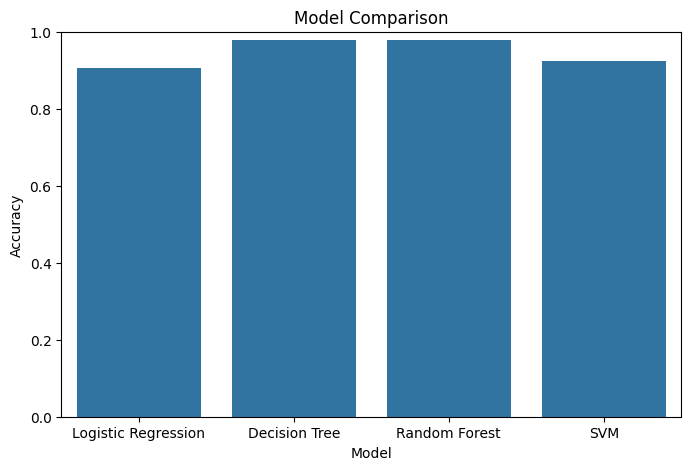

In [ ]:
# Compare model accuracies
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print(results_df)

# Plot comparison
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title("Model Comparison")
plt.ylim(0,1)
plt.show()


In [ ]:
import joblib
import os

# Define save path (same as before)
model_save_path = "/content/drive/MyDrive/SmartBankingModels/"

# Save models into Google Drive
joblib.dump(models["Logistic Regression"], os.path.join(model_save_path, "logistic_regression.pkl"))
joblib.dump(models["Decision Tree"], os.path.join(model_save_path, "decision_tree.pkl"))
joblib.dump(models["Random Forest"], os.path.join(model_save_path, "random_forest.pkl"))
joblib.dump(models["SVM"], os.path.join(model_save_path, "svm.pkl"))

# Save scaler
joblib.dump(scaler, os.path.join(model_save_path, "scaler.pkl"))

# Save encoders dictionary
joblib.dump(encoders, os.path.join(model_save_path, "encoders.pkl"))


['/content/drive/MyDrive/SmartBankingModels/encoders.pkl']

In [ ]:
!pip install gradio


In [ ]:
import joblib, os

load_path = "/content/drive/MyDrive/SmartBankingModels/"

# Load best model (you can swap with another if desired)
best_model = joblib.load(os.path.join(load_path, "random_forest.pkl"))

# Load scaler and encoders
scaler = joblib.load(os.path.join(load_path, "scaler.pkl"))
encoders = joblib.load(os.path.join(load_path, "encoders.pkl"))


In [ ]:
import sqlite3
import os

# Path to store database in Google Drive
db_path = "/content/drive/MyDrive/SmartBankingModels/bank_system.db"

# Connect to SQLite DB
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Create admin_users table
cursor.execute("""
CREATE TABLE IF NOT EXISTS admin_users (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    username TEXT UNIQUE NOT NULL,
    password TEXT NOT NULL
)
""")

# Create loan_applications table
cursor.execute("""
CREATE TABLE IF NOT EXISTS loan_applications (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    age INTEGER,
    dob TEXT,
    aadhaar_no TEXT,
    address TEXT,
    dependents INTEGER,
    education TEXT,
    self_employed TEXT,
    income_annum REAL,
    loan_amount REAL,
    loan_term INTEGER,
    cibil_score INTEGER,
    residential_assets_value REAL,
    commercial_assets_value REAL,
    luxury_assets_value REAL,
    bank_asset_value REAL,
    decision TEXT,
    probability REAL
)
""")

conn.commit()
print("✅ Database and tables ready at:", db_path)


✅ Database and tables ready at: /content/drive/MyDrive/SmartBankingModels/bank_system.db


In [ ]:
# Insert sample admin accounts (run once)
try:
    admins = [("admin1", "1234"), ("manager", "abcd"), ("officer", "pass123")]
    cursor.executemany("INSERT OR IGNORE INTO admin_users (username, password) VALUES (?, ?)", admins)
    conn.commit()
    print("✅ Default admin users created.")
except Exception as e:
    print("⚠️ Admin insertion error:", e)

# Function to check login
def check_login(username, password):
    cursor.execute("SELECT * FROM admin_users WHERE username=? AND password=?", (username, password))
    return cursor.fetchone() is not None


✅ Default admin users created.


In [ ]:
def save_application_to_db(app_data):
    try:
        cursor.execute("""
        INSERT INTO loan_applications
        (name, age, dob, aadhaar_no, address, dependents, education, self_employed,
         income_annum, loan_amount, loan_term, cibil_score, residential_assets_value,
         commercial_assets_value, luxury_assets_value, bank_asset_value, decision, probability)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """, (
            app_data["Name"], app_data["Age"], app_data["DOB"], app_data["Aadhaar No"], app_data["Address"],
            app_data["Dependents"], app_data["Education"], app_data["Self Employed"], app_data["Annual Income"],
            app_data["Loan Amount"], app_data["Loan Term"], app_data["CIBIL Score"],
            app_data["Residential Assets Value"], app_data["Commercial Assets Value"],
            app_data["Luxury Assets Value"], app_data["Bank Asset Value"], app_data["Decision"], app_data["Probability"]
        ))
        conn.commit()
    except Exception as e:
        print("⚠️ Database insert failed:", e)


In [ ]:
def show_admin_page(username, password):
    if not check_login(username, password):
        return "❌ Invalid username or password.", gr.update(visible=False), gr.update(visible=False), gr.update(visible=False), gr.update(visible=False)

    cursor.execute("SELECT * FROM loan_applications")
    rows = cursor.fetchall()
    if not rows:
        return "📭 No applications found in database.", gr.update(visible=False), gr.update(visible=False), gr.update(visible=False), gr.update(True)

    summaries = []
    for row in rows:
        summaries.append(f"""
🧾 **Application ID:** {row[0]}
**Name:** {row[1]}
**Age:** {row[2]}
**DOB:** {row[3]}
**Aadhaar No:** {row[4]}
**Address:** {row[5]}

**Dependents:** {row[6]}
**Education:** {row[7]}
**Self Employed:** {row[8]}
**Annual Income:** ₹{row[9]:,.2f}
**Loan Amount:** ₹{row[10]:,.2f}
**Loan Term:** {row[11]} months
**CIBIL Score:** {row[12]}
**Decision:** {row[17]}
📊 **Approval Probability:** {row[18]:.2%}
--------------------------------------------
""")

    full_report = f"### 🧾 Total Applications: {len(rows)}\n\n" + "\n".join(summaries)
    return full_report, gr.update(visible=False), gr.update(visible=False), gr.update(visible=False), gr.update(visible=True)


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import joblib, os, sqlite3

# ---------------- LOAD MODELS ----------------
load_path = "/content/drive/MyDrive/SmartBankingModels/"
log_reg = joblib.load(os.path.join(load_path, "logistic_regression.pkl"))
dtree   = joblib.load(os.path.join(load_path, "decision_tree.pkl"))
rf      = joblib.load(os.path.join(load_path, "random_forest.pkl"))
svm     = joblib.load(os.path.join(load_path, "svm.pkl"))
scaler  = joblib.load(os.path.join(load_path, "scaler.pkl"))
encoders = joblib.load(os.path.join(load_path, "encoders.pkl"))

# ---------------- DATABASE CONNECTION ----------------
db_path = "/content/drive/MyDrive/SmartBankingModels/bank_system.db"
conn = sqlite3.connect(db_path, check_same_thread=False)
cursor = conn.cursor()

# Ensure tables exist
cursor.execute("""
CREATE TABLE IF NOT EXISTS admin_users (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    username TEXT UNIQUE NOT NULL,
    password TEXT NOT NULL
)
""")
cursor.execute("""
CREATE TABLE IF NOT EXISTS loan_applications (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    age INTEGER,
    dob TEXT,
    aadhaar_no TEXT,
    address TEXT,
    dependents INTEGER,
    education TEXT,
    self_employed TEXT,
    income_annum REAL,
    loan_amount REAL,
    loan_term INTEGER,
    cibil_score INTEGER,
    residential_assets_value REAL,
    commercial_assets_value REAL,
    luxury_assets_value REAL,
    bank_asset_value REAL,
    decision TEXT,
    probability REAL
)
""")
conn.commit()

# Insert default admins
admins = [("admin1", "1234"), ("manager", "abcd"), ("officer", "pass123")]
cursor.executemany("INSERT OR IGNORE INTO admin_users (username, password) VALUES (?, ?)", admins)
conn.commit()

# ---------------- GLOBAL VARIABLES ----------------
edu_col = list(encoders.keys())[0]
selfemp_col = list(encoders.keys())[1]
applications = []

# ---------------- HELPER FUNCTIONS ----------------
def check_login(username, password):
    cursor.execute("SELECT * FROM admin_users WHERE username=? AND password=?", (username, password))
    return cursor.fetchone() is not None

def save_application_to_db(app_data):
    try:
        cursor.execute("""
        INSERT INTO loan_applications
        (name, age, dob, aadhaar_no, address, dependents, education, self_employed,
         income_annum, loan_amount, loan_term, cibil_score, residential_assets_value,
         commercial_assets_value, luxury_assets_value, bank_asset_value, decision, probability)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """, (
            app_data["Name"], app_data["Age"], app_data["DOB"], app_data["Aadhaar No"], app_data["Address"],
            app_data["Dependents"], app_data["Education"], app_data["Self Employed"], app_data["Annual Income"],
            app_data["Loan Amount"], app_data["Loan Term"], app_data["CIBIL Score"],
            app_data["Residential Assets Value"], app_data["Commercial Assets Value"],
            app_data["Luxury Assets Value"], app_data["Bank Asset Value"], app_data["Decision"], app_data["Probability"]
        ))
        conn.commit()
    except Exception as e:
        print("⚠️ DB Insert Failed:", e)

# ---------------- PREDICTION FUNCTION ----------------
def predict_loan(no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score,
                 residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value):
    try:
        applicant = {
            "no_of_dependents": [no_of_dependents],
            edu_col: [education],
            selfemp_col: [self_employed],
            "income_annum": [income_annum],
            "loan_amount": [loan_amount],
            "loan_term": [loan_term],
            "cibil_score": [cibil_score],
            "residential_assets_value": [residential_assets_value],
            "commercial_assets_value": [commercial_assets_value],
            "luxury_assets_value": [luxury_assets_value],
            "bank_asset_value": [bank_asset_value]
        }
        df = pd.DataFrame(applicant)
        for col, le in encoders.items():
            if col in df.columns:
                df[col] = le.transform(df[col])
        X = scaler.transform(df)

        models = {
            "Logistic Regression": log_reg,
            "Decision Tree": dtree,
            "Random Forest": rf,
            "SVM": svm
        }
        results = {}
        for name, model in models.items():
            pred = model.predict(X)[0]
            prob = model.predict_proba(X)[0][1] if hasattr(model, "predict_proba") else 0
            results[name] = f"Prediction: {'Approved' if pred==1 else 'Rejected'}, Probability: {prob:.2f}"
        return results
    except Exception as e:
        return {"Error": str(e)}

# ---------------- APPLICATION FUNCTION ----------------
def apply_for_loan(name, age, dob, aadhaar_no, address, no_of_dependents, education, self_employed, income_annum,
                   loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value,
                   luxury_assets_value, bank_asset_value):
    try:
        global applications
        app_id = len(applications) + 1

        applicant_data = {
            "Name": name,
            "Age": age,
            "DOB": dob,
            "Aadhaar No": aadhaar_no,
            "Address": address,
            "Dependents": no_of_dependents,
            "Education": education,
            "Self Employed": self_employed,
            "Annual Income": income_annum,
            "Loan Amount": loan_amount,
            "Loan Term": loan_term,
            "CIBIL Score": cibil_score,
            "Residential Assets Value": residential_assets_value,
            "Commercial Assets Value": commercial_assets_value,
            "Luxury Assets Value": luxury_assets_value,
            "Bank Asset Value": bank_asset_value
        }

        df = pd.DataFrame([{
            "no_of_dependents": no_of_dependents,
            edu_col: education,
            selfemp_col: self_employed,
            "income_annum": income_annum,
            "loan_amount": loan_amount,
            "loan_term": loan_term,
            "cibil_score": cibil_score,
            "residential_assets_value": residential_assets_value,
            "commercial_assets_value": commercial_assets_value,
            "luxury_assets_value": luxury_assets_value,
            "bank_asset_value": bank_asset_value
        }])

        for col, le in encoders.items():
            if col in df.columns:
                df[col] = le.transform(df[col])
        X = scaler.transform(df)
        pred = rf.predict(X)[0]
        prob = rf.predict_proba(X)[0][1]
        decision = "Approved" if pred == 1 else "Rejected"

        applicant_data["Decision"] = decision
        applicant_data["Probability"] = prob

        applications.append(applicant_data)
        save_application_to_db(applicant_data)

        details = f"""
🧾 **Loan Application Summary**

**Application ID:** {app_id}
**Name:** {name}
**Age:** {age}
**Date of Birth:** {dob}
**Aadhaar No:** {aadhaar_no}
**Address:** {address}

**Dependents:** {no_of_dependents}
**Education:** {education}
**Self Employed:** {self_employed}
**Annual Income:** ₹{income_annum:,.2f}
**Loan Amount:** ₹{loan_amount:,.2f}
**Loan Term:** {loan_term} months
**CIBIL Score:** {cibil_score}

🏦 **Loan Decision:** {decision}
📊 **Approval Probability:** {prob:.2%}
"""
        return details, gr.update(visible=True)
    except Exception as e:
        return f"Error: {e}", gr.update(visible=False)

# ---------------- ADMIN DASHBOARD ----------------
def show_admin_page(username, password):
    if not check_login(username, password):
        return "❌ Invalid username or password.", gr.update(visible=False), gr.update(visible=False), gr.update(visible=False), gr.update(visible=False), gr.update(visible=True)

    cursor.execute("SELECT * FROM loan_applications")
    rows = cursor.fetchall()
    if not rows:
        return "📭 No applications found in database.", gr.update(visible=False), gr.update(visible=False), gr.update(visible=False), gr.update(True), gr.update(visible=False)

    summaries = []
    for row in rows:
        summaries.append(f"""
🧾 **Application ID:** {row[0]}
**Name:** {row[1]} | **Age:** {row[2]} | **DOB:** {row[3]}
**Aadhaar No:** {row[4]} | **Address:** {row[5]}
**Dependents:** {row[6]} | **Education:** {row[7]} | **Self Employed:** {row[8]}
**Annual Income:** ₹{row[9]:,.2f} | **Loan Amount:** ₹{row[10]:,.2f} | **CIBIL:** {row[12]}
🏦 **Decision:** {row[17]} | 📊 **Probability:** {row[18]:.2%}
--------------------------------------------
""")
    full_report = f"### 🧾 Total Applications: {len(rows)}\n\n" + "\n".join(summaries)
    return full_report, gr.update(visible=False), gr.update(visible=False), gr.update(visible=False), gr.update(visible=True), gr.update(visible=False)

# ---------------- PAGE CONTROL ----------------
def go_to_predict_page():
    return gr.update(visible=False), gr.update(visible=True), gr.update(visible=False), gr.update(visible=False), gr.update(visible=False)

def back_to_home():
    return gr.update(visible=True), gr.update(visible=False), gr.update(visible=False), gr.update(visible=False), gr.update(visible=False)

def back_to_predict():
    return gr.update(visible=False), gr.update(visible=True), gr.update(visible=False), gr.update(visible=False), gr.update(visible=False)

# ---------------- GRADIO UI ----------------
with gr.Blocks(css="""
#start_btn, #admin_btn {
  display: block;
  margin: 20px auto;
  font-size: 18px;
  background-color: #00796B;
  color: white;
  padding: 12px 25px;
  border-radius: 10px;
  font-weight: bold;
  transition: 0.3s;
}
#start_btn:hover, #admin_btn:hover {
  background-color: #004D40;
  transform: scale(1.05);
}
""") as demo:

    gr.Markdown("<h1 style='text-align:center; color:#004D40;'>🏦 Smart Banking Assistant - Loan Eligibility & Application System</h1>")

    # HOME PAGE
    with gr.Group(visible=True) as home_page:
        gr.Markdown("<p style='text-align:center; font-size:18px;'>Welcome to <b>Smart Bank</b>! Check your eligibility or log in as Admin.</p>")
        start_btn = gr.Button("Click here to Check Loan Eligibility", elem_id="start_btn")
        admin_btn = gr.Button("Admin Login", elem_id="admin_btn")

    # PREDICTION PAGE
    with gr.Group(visible=False) as predict_page:
        gr.Markdown("<h2 style='text-align:center; color:#00695C;'>Loan Eligibility Prediction</h2>")
        with gr.Row():
            no_of_dependents = gr.Number(label="Number of Dependents")
            education = gr.Dropdown(choices=[str(c) for c in encoders[edu_col].classes_], label="Education")
        with gr.Row():
            self_employed = gr.Dropdown(choices=[str(c) for c in encoders[selfemp_col].classes_], label="Self Employed")
            income_annum = gr.Number(label="Annual Income")
        with gr.Row():
            loan_amount = gr.Number(label="Loan Amount")
            loan_term = gr.Number(label="Loan Term (Months)")
        with gr.Row():
            cibil_score = gr.Number(label="CIBIL Score")
            residential_assets_value = gr.Number(label="Residential Assets Value")
        with gr.Row():
            commercial_assets_value = gr.Number(label="Commercial Assets Value")
            luxury_assets_value = gr.Number(label="Luxury Assets Value")
        with gr.Row():
            bank_asset_value = gr.Number(label="Bank Asset Value")

        predict_btn = gr.Button("Predict Loan Eligibility")
        prediction_output = gr.JSON(label="Predictions from Models")
        go_to_application_btn = gr.Button("Go to Loan Application Page", visible=False)
        back_btn = gr.Button("🏠 Back to Home")

    # APPLICATION PAGE
    with gr.Group(visible=False) as apply_page:
        gr.Markdown("<h2 style='text-align:center; color:#00695C;'>Loan Application Form</h2>")
        with gr.Row():
            name = gr.Textbox(label="Applicant Name")
            age = gr.Number(label="Age")
        with gr.Row():
            dob = gr.Textbox(label="Date of Birth (DD-MM-YYYY)")
            aadhaar_no = gr.Textbox(label="Aadhaar Number")
        address = gr.Textbox(label="Address", lines=2)
        with gr.Row():
            no_of_dependents_app = gr.Number(label="Number of Dependents")
            education_app = gr.Dropdown(choices=[str(c) for c in encoders[edu_col].classes_], label="Education")
        with gr.Row():
            self_employed_app = gr.Dropdown(choices=[str(c) for c in encoders[selfemp_col].classes_], label="Self Employed")
            income_annum_app = gr.Number(label="Annual Income")
        with gr.Row():
            loan_amount_app = gr.Number(label="Loan Amount")
            loan_term_app = gr.Number(label="Loan Term (Months)")
        with gr.Row():
            cibil_score_app = gr.Number(label="CIBIL Score")
            residential_assets_value_app = gr.Number(label="Residential Assets Value")
        with gr.Row():
            commercial_assets_value_app = gr.Number(label="Commercial Assets Value")
            luxury_assets_value_app = gr.Number(label="Luxury Assets Value")
        with gr.Row():
            bank_asset_value_app = gr.Number(label="Bank Asset Value")

        apply_btn = gr.Button("Submit Loan Application")
        application_output = gr.Textbox(label="Application Status", lines=20)
        back_to_predict_btn = gr.Button("🔙 Back to Prediction Page")
        back_to_home_btn = gr.Button("🏠 Back to Home")

    # LOGIN PAGE
    with gr.Group(visible=False) as login_page:
        gr.Markdown("<h2 style='text-align:center; color:#00695C;'>🔐 Admin Login</h2>")
        username_in = gr.Textbox(label="Username")
        password_in = gr.Textbox(label="Password", type="password")
        login_btn = gr.Button("Login")
        login_message = gr.Markdown()
        back_to_home_login = gr.Button("🏠 Back to Home")

    # ADMIN PAGE
    with gr.Group(visible=False) as admin_page:
        gr.Markdown("<h2 style='text-align:center; color:#00695C;'>📋 Admin Dashboard</h2>")
        admin_output = gr.Markdown()
        back_admin_home_btn = gr.Button("🏠 Back to Home")

    # ---------------- CONNECTIONS ----------------
    start_btn.click(go_to_predict_page, outputs=[home_page, predict_page, apply_page, admin_page, login_page])
    admin_btn.click(lambda: (gr.update(visible=False), gr.update(visible=False), gr.update(visible=False), gr.update(visible=False), gr.update(visible=True)), outputs=[home_page, predict_page, apply_page, admin_page, login_page])

    predict_btn.click(
        predict_loan,
        inputs=[no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score,
                residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value],
        outputs=prediction_output
    ).then(
        lambda preds: gr.update(visible=True) if any("Approved" in v for v in preds.values()) else gr.update(visible=False),
        inputs=prediction_output,
        outputs=go_to_application_btn
    )

    go_to_application_btn.click(
        lambda *vals: (gr.update(visible=False), gr.update(visible=True), *vals),
        inputs=[no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term,
                cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value],
        outputs=[predict_page, apply_page, no_of_dependents_app, education_app, self_employed_app,
                 income_annum_app, loan_amount_app, loan_term_app, cibil_score_app,
                 residential_assets_value_app, commercial_assets_value_app, luxury_assets_value_app, bank_asset_value_app]
    )

    apply_btn.click(
        apply_for_loan,
        inputs=[name, age, dob, aadhaar_no, address, no_of_dependents_app, education_app, self_employed_app,
                income_annum_app, loan_amount_app, loan_term_app, cibil_score_app, residential_assets_value_app,
                commercial_assets_value_app, luxury_assets_value_app, bank_asset_value_app],
        outputs=[application_output, back_to_predict_btn]
    )

    login_btn.click(show_admin_page, inputs=[username_in, password_in], outputs=[admin_output, home_page, predict_page, apply_page, admin_page, login_page])

    back_btn.click(back_to_home, outputs=[home_page, predict_page, apply_page, admin_page, login_page])
    back_to_predict_btn.click(back_to_predict, outputs=[home_page, predict_page, apply_page, admin_page, login_page])
    back_to_home_btn.click(back_to_home, outputs=[home_page, predict_page, apply_page, admin_page, login_page])
    back_to_home_login.click(back_to_home, outputs=[home_page, predict_page, apply_page, admin_page, login_page])
    back_admin_home_btn.click(back_to_home, outputs=[home_page, predict_page, apply_page, admin_page, login_page])

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://75aa3dbd890834c74c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
